In [ ]:
import pandas as pd
college=pd.read_csv("https://raw.githubusercontent.com/imhardikj/Universities-Clustering/master/College_Data")
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
college.rename(columns={"Unnamed: 0":"collegename","Grad.Rate":"Grad_Rate"},inplace=True)

In [ ]:
college.Grad_Rate = college.Grad_Rate.replace(college.Grad_Rate.max(),100)

In [ ]:
coll=college.head(11)
print(coll)

                     collegename Private  Apps  Accept  Enroll  Top10perc  \
0   Abilene Christian University     Yes  1660    1232     721         23   
1             Adelphi University     Yes  2186    1924     512         16   
2                 Adrian College     Yes  1428    1097     336         22   
3            Agnes Scott College     Yes   417     349     137         60   
4      Alaska Pacific University     Yes   193     146      55         16   
5              Albertson College     Yes   587     479     158         38   
6        Albertus Magnus College     Yes   353     340     103         17   
7                 Albion College     Yes  1899    1720     489         37   
8               Albright College     Yes  1038     839     227         30   
9      Alderson-Broaddus College     Yes   582     498     172         21   
10             Alfred University     Yes  1732    1425     472         37   

    Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0  

In [ ]:
row=coll.drop(["collegename","Private"],axis=1)

In [ ]:
from sklearn.preprocessing import normalize
college1=normalize(row)

In [ ]:
import scipy.cluster.hierarchy as shc
college2=shc.linkage(college1)

{'color_list': ['g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.12086278215441966, 0.12086278215441966, 0.0],
  [0.0, 0.04508128413722418, 0.04508128413722418, 0.0],
  [0.0, 0.05113213357563552, 0.05113213357563552, 0.0],
  [0.04508128413722418,
   0.09022784273099921,
   0.09022784273099921,
   0.05113213357563552],
  [0.0, 0.09134527132412805, 0.09134527132412805, 0.09022784273099921],
  [0.0, 0.09988149460125455, 0.09988149460125455, 0.09134527132412805],
  [0.0, 0.14215500815720106, 0.14215500815720106, 0.09988149460125455],
  [0.0, 0.15782475575373076, 0.15782475575373076, 0.14215500815720106],
  [0.0, 0.17622749126367518, 0.17622749126367518, 0.15782475575373076],
  [0.12086278215441966,
   0.2628289165315877,
   0.2628289165315877,
   0.17622749126367518]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [65.0, 65.0, 90.0, 90.0],
  [55.0, 55.0, 77.5, 77.5],
  [45.0, 45.0, 66.25, 

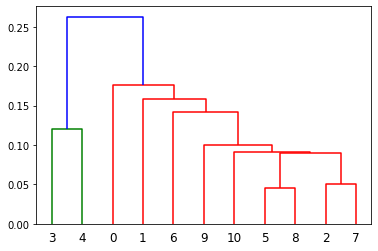

In [ ]:
shc.dendrogram(college2)

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
clustering=AgglomerativeClustering(n_clusters=3)
clustering.fit(college2)

AgglomerativeClustering(n_clusters=3)

In [ ]:
clabel=clustering.labels_

In [ ]:
t=pd.DataFrame(clabel)

In [ ]:
b=coll.collegename[:11]
data=pd.concat([b,t,row],axis=1)

In [ ]:
data.head(10)

,collegename,0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad_Rate
0,Abilene Christian University,1.0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1.0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0.0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,0.0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,0.0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,1.0,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,0.0,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,2.0,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,2.0,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,0.0,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [ ]:
data.to_csv("filepath")

<bound method NDFrame.to_csv of                      collegename    0  Apps  Accept  Enroll  Top10perc  \
0   Abilene Christian University  1.0  1660    1232     721         23   
1             Adelphi University  1.0  2186    1924     512         16   
2                 Adrian College  0.0  1428    1097     336         22   
3            Agnes Scott College  0.0   417     349     137         60   
4      Alaska Pacific University  0.0   193     146      55         16   
5              Albertson College  1.0   587     479     158         38   
6        Albertus Magnus College  0.0   353     340     103         17   
7                 Albion College  2.0  1899    1720     489         37   
8               Albright College  2.0  1038     839     227         30   
9      Alderson-Broaddus College  0.0   582     498     172         21   
10             Alfred University  NaN  1732    1425     472         37   

    Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0      